In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_theme(style="whitegrid", palette="viridis", context="notebook")


# Load the data
df = pd.read_csv('../seeds/chargeback_report_raw.csv')

In [27]:
df.head()

,external_ref,status,source,chargeback
0,_-UTDS0dMlagMWEtQKMy-,True,GLOBALPAY,False
1,_0fqf75KiPa0iiviKCSsU,True,GLOBALPAY,False
2,_0H9Ecd_RctsLetId-p14,True,GLOBALPAY,False
3,_0wBrMzAzIhO3fQRWUcBH,True,GLOBALPAY,False
4,_25jZuGDrmwUEdAwKp1xV,True,GLOBALPAY,False


In [28]:
df.dtypes

external_ref    object
status            bool
source          object
chargeback        bool
dtype: object

In [32]:
# Total rows for overview
print(f"Total records: {df.shape[0]}")

# Check for nulls
print(df.isnull().sum())

# Check for dups (external references look like they should be unique)
print(f"Duplicate external refs: {df['external_ref'].duplicated().sum()}")

print(f"Total columns: {df.shape[1]}")

Total records: 5430
external_ref    0
status          0
source          0
chargeback      0
dtype: int64
Duplicate external refs: 0
Total columns 4


/var/folders/dk/qy1z7_41257bjbrp99_83xs00000gn/T/ipykernel_565/3600936832.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis',
/var/folders/dk/qy1z7_41257bjbrp99_83xs00000gn/T/ipykernel_565/3600936832.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis',
/var/folders/dk/qy1z7_41257bjbrp99_83xs00000gn/T/ipykernel_565/3600936832.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis',


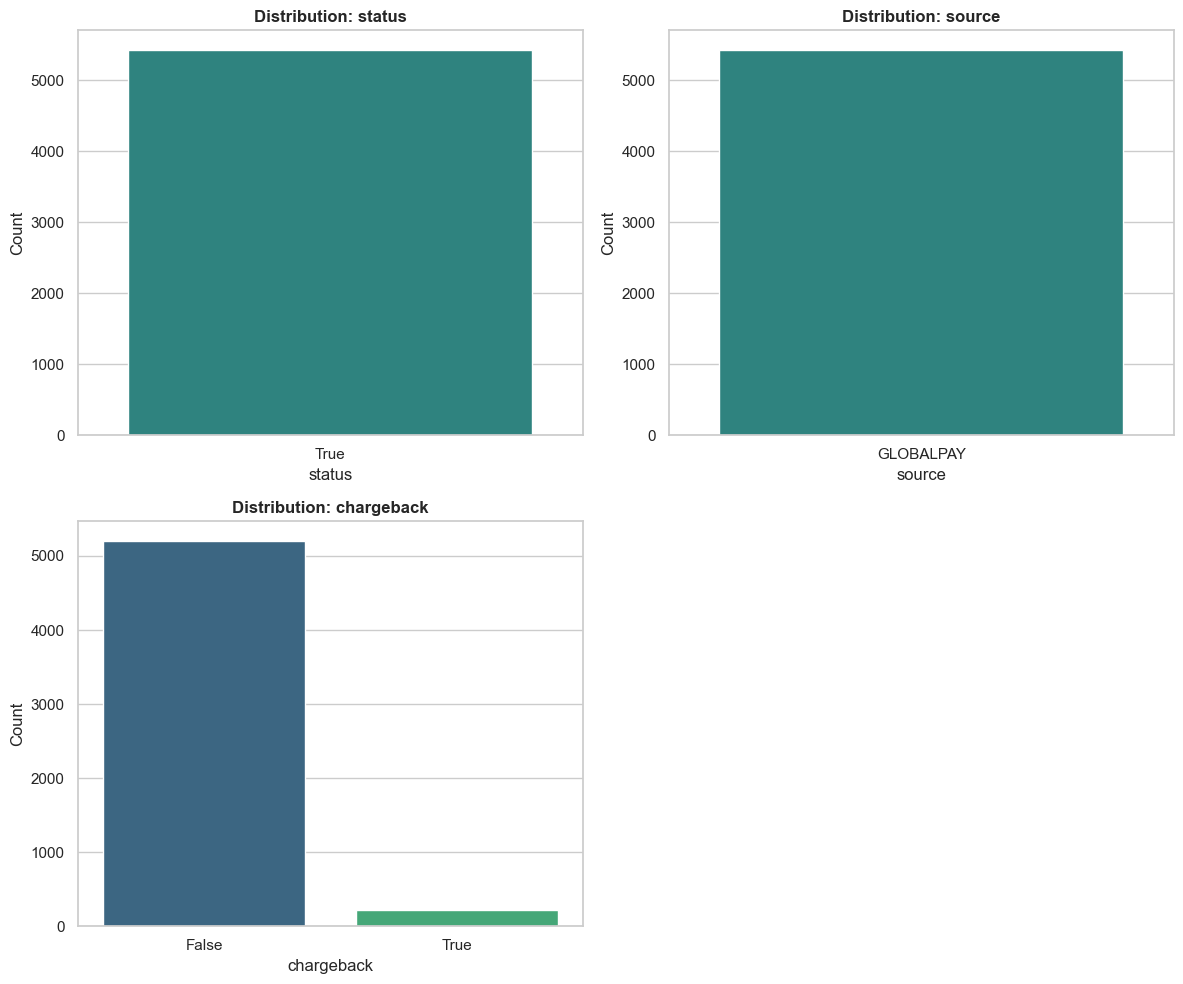

In [30]:
cols_to_check = ['status', 'source', 'chargeback']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten() 

for i, col in enumerate(cols_to_check):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis', 
                  order=df[col].value_counts().index)
    
    axes[i].set_title(f'Distribution: {col}', fontweight='bold')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')

axes[3].set_visible(False)
plt.tight_layout()
plt.savefig('../analyses/eda_graphics/chargeback_distribution_grid.png')
plt.show()